# Graphviz Charts

Graphviz diagrams can be generated using python code or entered directly as `dot` language code using `gvmagic`.

## Python code

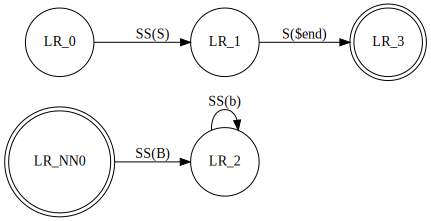

In [5]:
from graphviz import Digraph
f = Digraph('finite_state_machine')
f.attr(rankdir='LR', size='8,5')
f.attr('node', shape='doublecircle')
f.node('LR_NN0') ;f.node('LR_3');
f.attr('node', shape='circle')
f.edge('LR_NN0', 'LR_2', label='SS(B)'); f.edge('LR_0', 'LR_1', label='SS(S)')
f.edge('LR_1', 'LR_3', label='S($end)'); f.edge('LR_2', 'LR_2', label='SS(b)')
f

## Graphviz magic - `gvmagic`

Need to install magic properly...

In [6]:
#https://raw.github.com/cjdrake/ipython-magic/master/gvmagic.py
"""
Graphviz IPython magic extensions

Magic methods:
    %dot <dot graph>
    %%dot <dot ...
    ... graph>
    %dotstr "<dot graph>"
    %dotobj obj.to_dot()
    %dotobjs obj[0].to_dot(), obj[1].to_dot(), ...

    also: %twopi, %neato, %sdp, %fsdp, and %circo magic families.

Usage:
    %load_ext gvmagic
"""


from logging import info, error
from subprocess import Popen, PIPE

from IPython.core.display import display_svg
from IPython.core.magic import Magics
from IPython.core.magic import line_cell_magic
from IPython.core.magic import line_magic
from IPython.core.magic import magics_class


def run_graphviz(s, layout_engine='dot'):
    """Execute dot with a layout and return a raw SVG image, or None."""
    cmd = ['dot', '-Tsvg', '-K', layout_engine]

    dot = Popen(cmd, stdin=PIPE, stdout=PIPE, stderr=PIPE)
    stdoutdata, stderrdata = dot.communicate(s.encode('utf-8'))
    status = dot.wait()
    if status == 0:
        return stdoutdata
    else:
        fstr = "dot returned {}\n[==== stderr ====]\n{}"
        error(fstr.format(status, stderrdata.decode('utf-8')))
        return None


@magics_class
class GraphvizMagics(Magics):

    @line_cell_magic
    def dot(self, line, cell=None):
        self._from_cell(line, cell, 'dot')

    @line_magic
    def dotstr(self, line):
        self._from_str(line, 'dot')

    @line_magic
    def dotobj(self, line):
        self._from_obj(line, 'dot')

    @line_magic
    def dotobjs(self, line):
        self._from_objs(line, 'dot')

    @line_cell_magic
    def neato(self, line, cell=None):
        self._from_cell(line, cell, 'neato')

    @line_magic
    def neatostr(self, line):
        self._from_str(line, 'neato')

    @line_magic
    def neatoobj(self, line):
        self._from_obj(line, 'neato')

    @line_magic
    def neatoobjs(self, line):
        self._from_objs(line, 'neato')

    @line_cell_magic
    def sfdp(self, line, cell=None):
        self._from_cell(line, cell, 'sfdp')

    @line_magic
    def sfdpstr(self, line):
        self._from_str(line, 'sfdp')

    @line_magic
    def sfdpobj(self, line):
        self._from_obj(line, 'sfdp')

    @line_magic
    def sfdpobjs(self, line):
        self._from_objs(line, 'sfdp')

    @line_cell_magic
    def fdp(self, line, cell=None):
        self._from_cell(line, cell, 'fdp')

    @line_magic
    def fdpstr(self, line):
        self._from_str(line, 'fdp')

    @line_magic
    def fdpobj(self, line):
        self._from_obj(line, 'fdp')

    @line_magic
    def fdpobjs(self, line):
        self._from_objs(line, 'fdp')

    @line_cell_magic
    def twopi(self, line, cell=None):
        self._from_cell(line, cell, 'twopi')

    @line_magic
    def twopistr(self, line):
        self._from_str(line, 'twopi')

    @line_magic
    def twopiobj(self, line):
        self._from_obj(line, 'twopi')

    @line_magic
    def twopiobjs(self, line):
        self._from_objs(line, 'twopi')

    @line_cell_magic
    def circo(self, line, cell=None):
        self._from_cell(line, cell, 'circo')

    @line_magic
    def circostr(self, line):
        self._from_str(line, 'circo')

    @line_magic
    def circoobj(self, line):
        self._from_obj(line, 'circo')

    @line_magic
    def circoobjs(self, line):
        self._from_objs(line, 'circo')

    def _from_cell(self, line, cell, layout_engine):
        if cell is None:
            s = line
        else:
            s = line + '\n' + cell
        data = run_graphviz(s, layout_engine)
        if data:
            display_svg(data, raw=True)

    def _from_str(self, line, layout_engine):
        s = self.shell.ev(line)
        data = run_graphviz(s, layout_engine)
        if data:
            display_svg(data, raw=True)

    def _from_obj(self, line, layout_engine):
        obj = self.shell.ev(line)
        try:
            s = obj.to_dot()
        except AttributeError:
            error("expected object to implement 'to_dot()' method")
        except TypeError:
            error("expected to_dot method to be callable w/o args")
        else:
            data = run_graphviz(s, layout_engine)
            if data:
                display_svg(data, raw=True)

    def _from_objs(self, line, layout_engine):
        """dot objects magic"""
        objs = self.shell.ev(line)
        for i, obj in enumerate(objs):
            try:
                s = obj.to_dot()
            except AttributeError:
                error("expected object to implement 'to_dot()' method")
            except TypeError:
                error("expected to_dot method to be callable w/o args")
            else:
                data = run_graphviz(s, layout_engine)
                if data:
                    info("object {}:".format(i))
                    display_svg(data, raw=True)


def load_ipython_extension(ipython):
    """Load the extension in IPython."""
    ipython.register_magics(GraphvizMagics)


def unload_ipython_extension(ipython):
    """Unload the extension in IPython."""
    pass

ip = get_ipython()
ip.register_magics(GraphvizMagics)

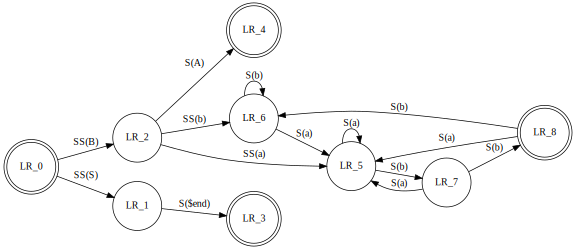

In [9]:
%%dot digraph finite_state_machine {
    rankdir=LR;
    size="8,5"
    node [shape = doublecircle]; LR_0 LR_3 LR_4 LR_8;
    node [shape = circle];
    LR_0 -> LR_2 [ label = "SS(B)" ];
    LR_0 -> LR_1 [ label = "SS(S)" ];
    LR_1 -> LR_3 [ label = "S($end)" ];
    LR_2 -> LR_6 [ label = "SS(b)" ];
    LR_2 -> LR_5 [ label = "SS(a)" ];
    LR_2 -> LR_4 [ label = "S(A)" ];
    LR_5 -> LR_7 [ label = "S(b)" ];
    LR_5 -> LR_5 [ label = "S(a)" ];
    LR_6 -> LR_6 [ label = "S(b)" ];
    LR_6 -> LR_5 [ label = "S(a)" ];
    LR_7 -> LR_8 [ label = "S(b)" ];
    LR_7 -> LR_5 [ label = "S(a)" ];
    LR_8 -> LR_6 [ label = "S(b)" ];
    LR_8 -> LR_5 [ label = "S(a)" ];
}